In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/wandb_export_2025-01-27T22_23_09.875+01_00.csv')
#data = pd.read_csv('data/marcus/wandb_export_2025-01-27T22_45_23.655+01_00.csv')
pd.set_option("display.max_columns", None)

In [4]:
data.head(20)

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,_hash,data_path,dislike_threshold,end_sep,like_threshold,min_neg_ratings,min_pos_ratings,model_type,nb_neg,nb_pos,nb_test_users,offset,prompt_id,prompts,sep,users_seed,xp_name,ndcg_1,ndcg_1_std,ndcg_2,ndcg_2_std,ndcg_3,ndcg_3_std,ndcg_4,ndcg_4_std,ndcg_5,ndcg_5_std,pop_1,pop_1_std,precision_1,precision_1_std,precision_2,precision_2_std,precision_3,precision_3_std,precision_4,precision_4_std,precision_5,precision_5_std,recall_1,recall_1_std,recall_2,recall_2_std,recall_3,recall_3_std,recall_4,recall_4_std,recall_5,recall_5_std
0,fallen-thunder-94,crashed,-,NaN,NaN,2025-01-14T07:56:37.000Z,1,NaN,1868926016067040500,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,5,50,100,3,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,nb_pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,easy-mountain-93,finished,-,NaN,NaN,2025-01-14T07:55:57.000Z,39,NaN,1179291037083628000,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,5,50,100,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,nb_pos,0.32,0.466476,0.458805,0.443931,0.568805,0.372877,0.637713,0.292533,0.668661,0.238994,4.934531,5.203659,0.32,0.466476,0.27,0.249199,0.253333,0.142361,0.230,0.067823,0.2,5.551115e-17,0.32,0.466476,0.54,0.498397,0.76,0.427083,0.92,0.271293,1.0,0.0
2,efficient-aardvark-92,finished,-,NaN,NaN,2025-01-14T07:55:18.000Z,38,NaN,315359558536605060,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,5,50,50,3,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,nb_pos,0.34,0.473709,0.504042,0.435248,0.594042,0.368257,0.619882,0.339667,0.681779,0.242385,4.728799,4.584142,0.34,0.473709,0.30,0.244949,0.260000,0.138082,0.210,0.091652,0.2,5.551115e-17,0.34,0.473709,0.60,0.489898,0.78,0.414246,0.84,0.366606,1.0,0.0
3,dauntless-music-91,finished,-,NaN,NaN,2025-01-14T07:54:41.000Z,35,NaN,821207727878663600,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,5,50,50,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,nb_pos,0.34,0.473709,0.504042,0.435248,0.584042,0.377351,0.652950,0.294673,0.683898,0.239649,5.224734,5.527623,0.34,0.473709,0.30,0.244949,0.253333,0.142361,0.230,0.067823,0.2,5.551115e-17,0.34,0.473709,0.60,0.489898,0.76,0.427083,0.92,0.271293,1.0,0.0
4,earthy-plant-90,finished,-,NaN,NaN,2025-01-14T07:54:06.000Z,34,NaN,1664157926746306300,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,5,50,0,3,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,nb_pos,0.32,0.466476,0.433567,0.451301,0.533567,0.396180,0.593862,0.339040,0.655759,0.248085,6.067134,5.511233,0.32,0.466476,0.25,0.250000,0.233333,0.152753,0.210,0.091652,0.2,5.551115e-17,0.32,0.466476,0.50,0.500000,0.70,0.458258,0.84,0.366606,1.0,0.0
5,deep-hill-89,finished,-,NaN,NaN,2025-01-14T07:53:29.000Z,35,NaN,453592704829253400,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,5,50,0,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,nb_pos,0.24,0.427083,0.404042,0.424558,0.504042,0.373418,0.555723,0.327000,0.625356,0.227209,4.566690,4.558128,0.24,0.427083,0.25,0.250000,0.233333,0.152753,0.205,0.096047,0.2,5.551115e-17,0.24,0.427083,0.50,0.500000,0.70,0.458258,0.82,0.384187,1.0,0.0
6,glorious-vortex-88,finished,-,NaN,NaN,2025-01-14T07:52:58.000Z,29,NaN,934843195360484100,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,3,50,150,3,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,nb_pos,0.34,0.473709,0.516660,0.429561,0.576660,0.385906,0.619728,0.340508,0.681624,0.243601,4.658560,4.488739,0.34,0.473709,0.31,0.242693,0.246667,0.146211,0.210,0.091652,0.2,5.551115e-17,0.34,0.473709,0.62,0.485386,0.74,0.438634,0.84,0.366606,1.0,0.0
7,tough-vortex-87,finished,-,NaN,NaN,2025-01-14T07:52:24.000Z,32,NaN,1686034882142333200,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,3,50,150,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,nb_pos,0.38,0.485386,0.468330,0.465185,0.568330,0.403399,0.63

In [5]:
data_filtered = data[['Name', 'Runtime', 'model_type', 'nb_pos', 'ndcg_1', 'ndcg_1_std', 'pop_1', 'pop_1_std', 'precision_1', 'precision_1_std', 'prompts','nb_test_users', 'offset']]
data_filtered = data_filtered[data_filtered['model_type'] == 'gpt2']
data_filtered

,Name,Runtime,model_type,nb_pos,ndcg_1,ndcg_1_std,pop_1,pop_1_std,precision_1,precision_1_std,prompts,nb_test_users,offset
0,fallen-thunder-94,1,gpt2,5,NaN,NaN,NaN,NaN,NaN,NaN,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,100
1,easy-mountain-93,39,gpt2,5,0.32,0.466476,4.934531,5.203659,0.32,0.466476,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,100
2,efficient-aardvark-92,38,gpt2,5,0.34,0.473709,4.728799,4.584142,0.34,0.473709,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,50
3,dauntless-music-91,35,gpt2,5,0.34,0.473709,5.224734,5.527623,0.34,0.473709,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,50
4,earthy-plant-90,34,gpt2,5,0.32,0.466476,6.067134,5.511233,0.32,0.466476,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,copper-bird-5,18,gpt2,1,0.24,0.427083,3.809377,3.674253,0.24,0.427083,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,100
90,rosy-voice-4,21,gpt2,1,0.44,0.496387,5.227303,4.841235,0.44,0.496387,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,50
91,gentle-firebrand-3,18,gpt2,1,0.30,0.458258,3.945538,4.716521,0.30,0.458258,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,50
92,neat-tree-2,20,gpt2,1,0.32,0.466476,5.941506,6.510474,0.32,0.466476,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0


In [10]:
data_filtered['offset'].unique()

array([100,  50,   0, 150])

In [6]:
data_filtered['prompts'].unique()

array(["('[M]', 'Movies like [M]', 'Movies similar to [M]', 'Movies like: [M]', 'Movies similar to: [M]', 'If you liked [M] you will also like')"],
      dtype=object)

In [7]:
data_filtered['MAP@1'] = data_filtered['precision_1'] / data_filtered['nb_test_users'] * 100
data_filtered

,Name,Runtime,model_type,nb_pos,ndcg_1,ndcg_1_std,pop_1,pop_1_std,precision_1,precision_1_std,prompts,nb_test_users,offset,MAP@1
0,fallen-thunder-94,1,gpt2,5,NaN,NaN,NaN,NaN,NaN,NaN,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,100,NaN
1,easy-mountain-93,39,gpt2,5,0.32,0.466476,4.934531,5.203659,0.32,0.466476,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,100,0.64
2,efficient-aardvark-92,38,gpt2,5,0.34,0.473709,4.728799,4.584142,0.34,0.473709,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,50,0.68
3,dauntless-music-91,35,gpt2,5,0.34,0.473709,5.224734,5.527623,0.34,0.473709,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,50,0.68
4,earthy-plant-90,34,gpt2,5,0.32,0.466476,6.067134,5.511233,0.32,0.466476,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,copper-bird-5,18,gpt2,1,0.24,0.427083,3.809377,3.674253,0.24,0.427083,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,100,0.48
90,rosy-voice-4,21,gpt2,1,0.44,0.496387,5.227303,4.841235,0.44,0.496387,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,50,0.88
91,gentle-firebrand-3,18,gpt2,1,0.30,0.458258,3.945538,4.716521,0.30,0.458258,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,50,0.60
92,neat-tree-2,20,gpt2,1,0.32,0.466476,5.941506,6.510474,0.32,0.466476,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0,0.64


In [8]:
data_filtered.describe()

,Runtime,nb_pos,ndcg_1,ndcg_1_std,pop_1,pop_1_std,precision_1,precision_1_std,nb_test_users,offset,MAP@1
count,94.000000,94.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,94.0,94.000000,93.000000
mean,29.882979,6.191489,0.359140,0.474071,5.248593,5.210319,0.359355,0.474239,50.0,73.404255,0.718710
std,11.218127,5.831462,0.069574,0.022904,0.856550,0.809792,0.069623,0.022953,0.0,55.697980,0.139247
min,1.000000,1.000000,0.200000,0.400000,3.384400,3.428856,0.200000,0.400000,50.0,0.000000,0.400000
25%,21.250000,2.000000,0.320000,0.466476,4.696017,4.716521,0.320000,0.466476,50.0,12.500000,0.640000
50%,26.500000,3.000000,0.360000,0.480000,5.269333,5.269850,0.360000,0.480000,50.0,50.000000,0.720000
75%,35.000000,9.250000,0.400000,0.489898,5.855853,5.775755,0.400000,0.489898,50.0,100.000000,0.800000
max,84.000000,20.000000,0.500000,0.500000,7.364262,7.202305,0.500000,0.500000,50.0,150.000000,1.000000


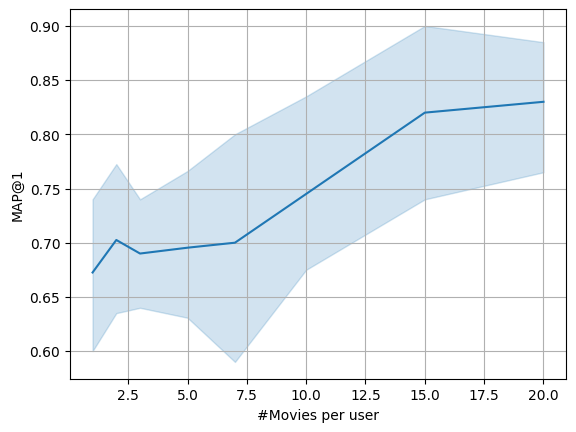

In [9]:
sns.lineplot(data=data_filtered, x="nb_pos", y="MAP@1")
plt.xlabel("#Movies per user")
plt.grid(True)